In [43]:
from __future__ import division
import glob
import xclim as xc
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

In [44]:
# paths
geomip_dir = "/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/"
scomip_dir = "/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/"

# read data
# G6sulfur
g6sulfur_files = glob.glob(geomip_dir+"G6sulfur/r1i1p1f2/day/pr/gn/latest/*20500101-21001230.nc")
ds_sulfur = xr.open_mfdataset(g6sulfur_files).sel(time=slice('2090-01-01','2100-12-30'))
# G6solar
g6solar_files = glob.glob(geomip_dir+"G6solar/r1i1p1f2/day/pr/gn/latest/*20500101-21001230.nc")
ds_solar = xr.open_mfdataset(g6solar_files).sel(time=slice('2090-01-01','2100-12-30'))
# SSP245
ssp245_files = glob.glob(scomip_dir+"ssp245/r1i1p1f2/day/pr/gn/latest/*20500101-21001230.nc")
ds_245 = xr.open_mfdataset(ssp245_files).sel(time=slice('2090-01-01','2100-12-30'))
# SSP585
ssp585_files = glob.glob(scomip_dir+"ssp585/r1i1p1f2/day/pr/gn/latest/*20500101-21001230.nc")
ds_585 = xr.open_mfdataset(ssp585_files).sel(time=slice('2090-01-01','2100-12-30'))

In [45]:
# calculate RX5day 
rx_sulfur = xc.indicators.icclim.RX5day(ds_sulfur.pr, freq="MS")
rx_solar = xc.indicators.icclim.RX5day(ds_solar.pr, freq="MS")
rx_245 = xc.indicators.icclim.RX5day(ds_245.pr, freq="MS")
rx_585 = xc.indicators.icclim.RX5day(ds_585.pr, freq="MS")

/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(


In [36]:
print(rx_solar)

<xarray.DataArray 'RX5day' (time: 972, lat: 32, lon: 192)>
dask.array<where, shape=(972, 32, 192), dtype=float64, chunksize=(1, 32, 192), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2020-01-01 00:00:00 ... 2100-12-01 00:00:00
  * lat      (lat) float64 -19.38 -18.12 -16.88 -15.62 ... 16.88 18.12 19.38
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 ... 353.4 355.3 357.2 359.1
Attributes:
    units:          mm
    cell_methods:   area: time: mean time: sum within days time: maximum over...
    xclim_history:  2019-10-30T09:57:55Z altered by CMOR: replaced missing va...
    standard_name:  lwe_thickness_of_precipitation_amount
    long_name:      Highest 5-day precipitation amount
    description:    Monthly maximum 5-day total precipitation.


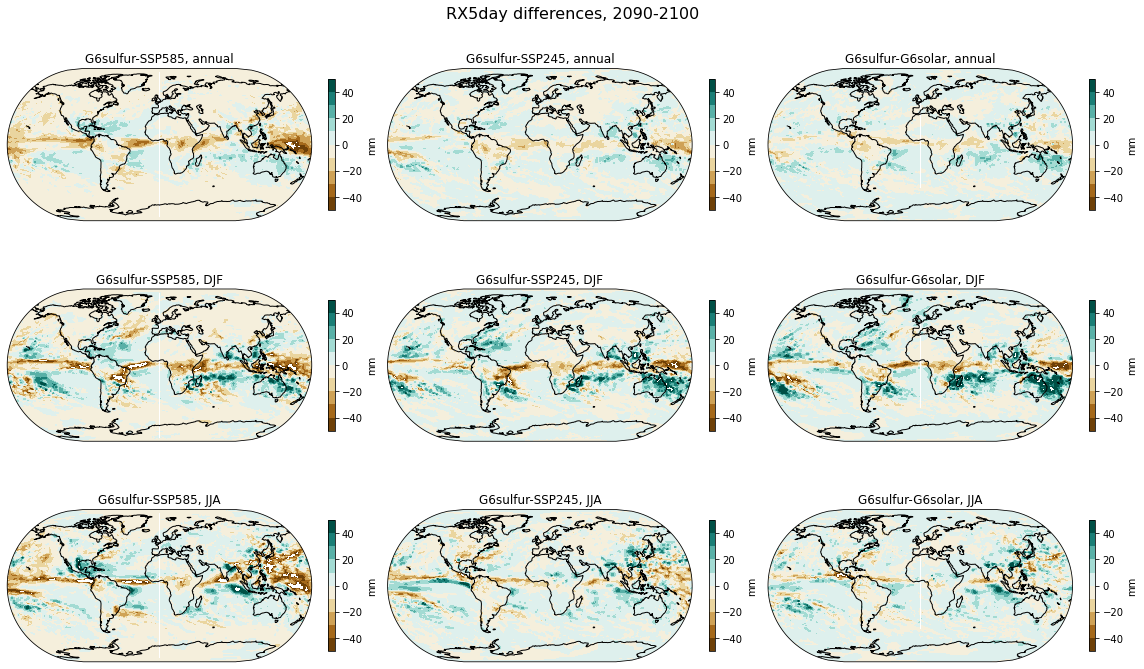

In [46]:
from matplotlib import (cm, colors)
def make_colourmap(vmin, vmax, n, **kwargs):
    '''
    Makes a colormap from ``vmin`` (inclusive) to ``vmax`` (exclusive) with
    ``n`` boundaries. Optionally includes choice of color and
    to extend the colormap.
    '''
    col = kwargs.pop('col', 'viridis')
    extend = kwargs.pop('extend', 'both')
    boundaries = list(np.linspace(vmin, vmax, n))
    cmap_new = cm.get_cmap(col, len(boundaries) + 1)
    colours = list(cmap_new(np.arange(len(boundaries) + 1)))
    cmap = colors.ListedColormap(colours[1:-1],"")
    cmap.set_over(colours[-1])
    cmap.set_under(colours[0])
    norm = colors.BoundaryNorm(boundaries, ncolors = len(boundaries) - 1,
                               clip = False)
    boundaries = [2*vmin-10]+boundaries+[2*vmax+10]
    return boundaries, cmap, norm

fig1, axs1 = plt.subplots(nrows=3, ncols=3, figsize=(16, 10), subplot_kw={'projection': ccrs.EckertIII()})

# color bar settings
#boundaries, cmap, norm = make_colourmap(-30, 30, 11, col = 'BrBG')

######### 9-panel graph ##########
# annual
# G6sulfur-SSP585
cf1 = axs1[0,0].contourf(rx_sulfur.lon, rx_sulfur.lat, rx_sulfur.mean('time')-rx_585.mean('time'), \
                        transform=ccrs.PlateCarree(), levels=np.linspace(-50,50,11), cmap="BrBG")
fig1.colorbar(cf1, ax=axs1[0,0], orientation='vertical', fraction=0.02, label="mm")
axs1[0,0].coastlines()
axs1[0,0].set_global()
axs1[0,0].set_title("G6sulfur-SSP585, annual")

# G6sulfur-SSP245
cf2 = axs1[0,1].contourf(rx_sulfur.lon, rx_sulfur.lat, rx_sulfur.mean('time')-rx_245.mean('time'), \
                        transform=ccrs.PlateCarree(), levels=np.linspace(-50,50,11), cmap="BrBG")
fig1.colorbar(cf2, ax=axs1[0,1], orientation='vertical',fraction=0.02, label="mm")
axs1[0,1].coastlines()
axs1[0,1].set_global()
axs1[0,1].set_title("G6sulfur-SSP245, annual")

# G6sulfur-G6solar
cf3 = axs1[0,2].contourf(rx_sulfur.lon, rx_sulfur.lat, rx_sulfur.mean('time')-rx_solar.mean('time'), \
                        transform=ccrs.PlateCarree(), levels=np.linspace(-50,50,11), cmap="BrBG")
fig1.colorbar(cf3, ax=axs1[0,2], orientation='vertical',fraction=0.02, label="mm")
axs1[0,2].coastlines()
axs1[0,2].set_global()
axs1[0,2].set_title("G6sulfur-G6solar, annual")

# DJF
# G6sulfur-SSP585
cf4 = axs1[1,0].contourf(rx_sulfur.lon, rx_sulfur.lat, (rx_sulfur-rx_585).groupby('time.month').mean('time').sel(month=[1,2,12]).mean('month'), \
                        transform=ccrs.PlateCarree(), levels=np.linspace(-50,50,11), cmap="BrBG")
fig1.colorbar(cf4, ax=axs1[1,0], orientation='vertical', fraction=0.02, label="mm")
axs1[1,0].coastlines()
axs1[1,0].set_global()
axs1[1,0].set_title("G6sulfur-SSP585, DJF")

# G6sulfur-SSP245
cf5 = axs1[1,1].contourf(rx_sulfur.lon, rx_sulfur.lat, (rx_sulfur-rx_245).groupby('time.month').mean('time').sel(month=[1,2,12]).mean('month'), \
                        transform=ccrs.PlateCarree(), levels=np.linspace(-50,50,11), cmap="BrBG")
fig1.colorbar(cf5, ax=axs1[1,1], orientation='vertical', fraction=0.02, label="mm")
axs1[1,1].coastlines()
axs1[1,1].set_global()
axs1[1,1].set_title("G6sulfur-SSP245, DJF")

# G6sulfur-G6solar
cf6 = axs1[1,2].contourf(rx_sulfur.lon, rx_sulfur.lat, (rx_sulfur-rx_solar).groupby('time.month').mean('time').sel(month=[1,2,12]).mean('month'), \
                        transform=ccrs.PlateCarree(), levels=np.linspace(-50,50,11), cmap="BrBG")
fig1.colorbar(cf6, ax=axs1[1,2], orientation='vertical', fraction=0.02, label="mm")
axs1[1,2].coastlines()
axs1[1,2].set_global()
axs1[1,2].set_title("G6sulfur-G6solar, DJF")

# JJA
# G6sulfur-SSP585
cf7 = axs1[2,0].contourf(rx_sulfur.lon, rx_sulfur.lat, (rx_sulfur-rx_585).groupby('time.month').mean('time').sel(month=[6,7,8]).mean('month'), \
                        transform=ccrs.PlateCarree(), levels=np.linspace(-50,50,11), cmap='BrBG')
fig1.colorbar(cf7, ax=axs1[2,0], orientation='vertical', fraction=0.02, label="mm")
axs1[2,0].coastlines()
axs1[2,0].set_global()
axs1[2,0].set_title("G6sulfur-SSP585, JJA")

# G6sulfur-SSP245
cf8 = axs1[2,1].contourf(rx_sulfur.lon, rx_sulfur.lat, (rx_sulfur-rx_245).groupby('time.month').mean('time').sel(month=[6,7,8]).mean('month'), \
                        transform=ccrs.PlateCarree(), levels=np.linspace(-50,50,11), cmap='BrBG')
fig1.colorbar(cf8, ax=axs1[2,1], orientation='vertical', fraction=0.02, label="mm")
axs1[2,1].coastlines()
axs1[2,1].set_global()
axs1[2,1].set_title("G6sulfur-SSP245, JJA")

# G6sulfur-G6solar
cf9 = axs1[2,2].contourf(rx_sulfur.lon, rx_sulfur.lat, (rx_sulfur-rx_solar).groupby('time.month').mean('time').sel(month=[6,7,8]).mean('month'), \
                        transform=ccrs.PlateCarree(), levels=np.linspace(-50,50,11), cmap='BrBG')
fig1.colorbar(cf9, ax=axs1[2,2], orientation='vertical', fraction=0.02, label="mm")
axs1[2,2].coastlines()
axs1[2,2].set_global()
axs1[2,2].set_title("G6sulfur-G6solar, JJA")

fig1.suptitle("RX5day differences, 2090-2100", fontsize=16)
fig1.tight_layout()

plt.savefig("plots/CMIP6Hackathon/diff_G6_SSP_rx5day_2090-2100_annual_djf_jja_dpi300.png", format="png", dpi=300)

plt.show()

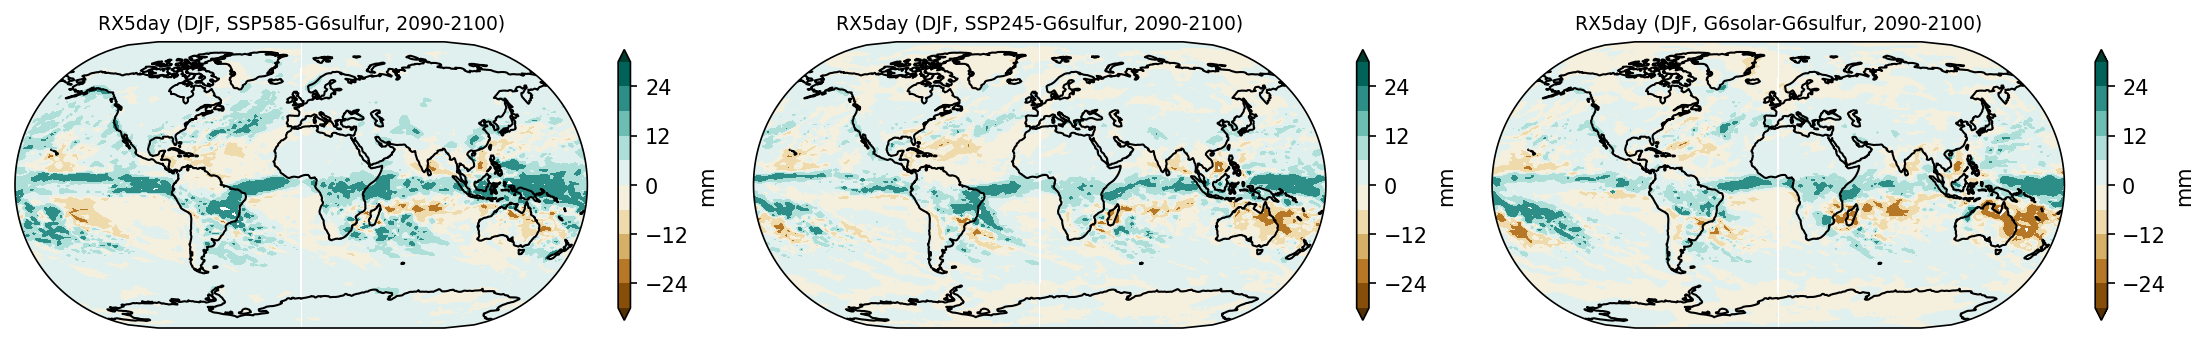

In [25]:
fig2 = plt.figure(figsize=(18,6),dpi=150)

# SSP585-G6sulfur
ax = fig2.add_subplot(1,3, 1, projection=ccrs.EckertIII())
filled_c = ax.contourf(rx_sulfur.lon, rx_sulfur.lat, (rx_585-rx_sulfur).groupby('time.month').mean('time').sel(month=[1,2,12]).mean('month'),
                transform=ccrs.PlateCarree(), levels=boundaries, cmap=cmap)
fig2.colorbar(cm.ScalarMappable(cmap=cmap,norm=norm), orientation='vertical',fraction=0.02, extend='both', label="mm")
ax.coastlines()
ax.set_global()
plt.title('RX5day (DJF, SSP585-G6sulfur, 2090-2100)',fontsize=9)

ax = fig2.add_subplot(1, 3, 2, projection=ccrs.EckertIII())
filled_c = ax.contourf(rx_sulfur.lon, rx_sulfur.lat, (rx_245-rx_sulfur).groupby('time.month').mean('time').sel(month=[1,2,12]).mean('month'),
                transform=ccrs.PlateCarree(), levels=boundaries, cmap=cmap)
fig2.colorbar(cm.ScalarMappable(cmap=cmap,norm=norm), orientation='vertical',fraction=0.02, extend='both', label="mm")
ax.coastlines()
ax.set_global()
plt.title('RX5day (DJF, SSP245-G6sulfur, 2090-2100)',fontsize=9)

ax = fig2.add_subplot(1, 3, 3, projection=ccrs.EckertIII())
filled_c = ax.contourf(rx_sulfur.lon, rx_sulfur.lat, (rx_solar-rx_sulfur).groupby('time.month').mean('time').sel(month=[1,2,12]).mean('month'),
                transform=ccrs.PlateCarree(), levels=boundaries, cmap=cmap)
fig2.colorbar(cm.ScalarMappable(cmap=cmap,norm=norm), orientation='vertical',fraction=0.02, extend='both', label="mm")
ax.coastlines()
ax.set_global()
plt.title('RX5day (DJF, G6solar-G6sulfur, 2090-2100)',fontsize=9)

plt.savefig("plots/CMIP6Hackathon/diff_G6_SSP_rx5day_2090-2100_djf_dpi150.png", format="png", dpi=150)

plt.show()

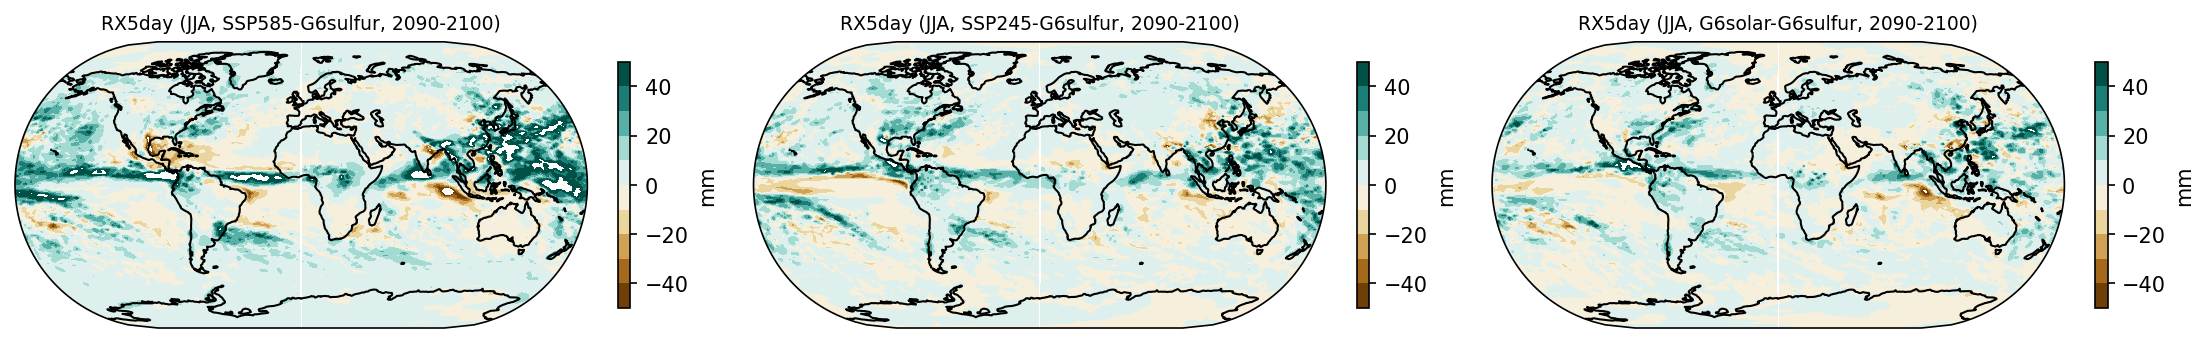

In [20]:
fig3 = plt.figure(figsize=(18,6),dpi=150)
ax = fig3.add_subplot(1,3, 1, projection=ccrs.EckertIII())
filled_c = ax.contourf(rx_sulfur.lon, rx_sulfur.lat, (rx_585-rx_sulfur).groupby('time.month').mean('time').sel(month=[6,7,8]).mean('month'),
                transform=ccrs.PlateCarree(), levels=np.linspace(-50,50,11),
                cmap='BrBG')
fig3.colorbar(filled_c, orientation='vertical',fraction=0.02, label="mm")
ax.coastlines()
ax.set_global()
plt.title('RX5day (JJA, SSP585-G6sulfur, 2090-2100)',fontsize=9)

ax = fig3.add_subplot(1, 3, 2, projection=ccrs.EckertIII())
filled_c = ax.contourf(rx_sulfur.lon, rx_sulfur.lat, (rx_245-rx_sulfur).groupby('time.month').mean('time').sel(month=[6,7,8]).mean('month'),
                transform=ccrs.PlateCarree(), levels=np.linspace(-50,50,11),
                cmap='BrBG')
fig3.colorbar(filled_c, orientation='vertical',fraction=0.02, label="mm")
ax.coastlines()
ax.set_global()
plt.title('RX5day (JJA, SSP245-G6sulfur, 2090-2100)',fontsize=9)

ax = fig3.add_subplot(1, 3, 3, projection=ccrs.EckertIII())
filled_c = ax.contourf(rx_sulfur.lon, rx_sulfur.lat, (rx_solar-rx_sulfur).groupby('time.month').mean('time').sel(month=[6,7,8]).mean('month'),
                transform=ccrs.PlateCarree(), levels=np.linspace(-50,50,11),
                cmap='BrBG')
fig3.colorbar(filled_c, orientation='vertical',fraction=0.02, label="mm")
ax.coastlines()
ax.set_global()
plt.title('RX5day (JJA, G6solar-G6sulfur, 2090-2100)',fontsize=9)

plt.savefig("plots/CMIP6Hackathon/diff_G6_SSP_rx5day_2090-2100_jja_dpi150.png", format="png", dpi=150)

plt.show()